In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [30]:
# define the number of rows and columns (height & width) of images
ROWS = 28
COLS = 28

# read data in from csv
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# print the training data
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [32]:
# labels from kaggle
labels = { 
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

In [33]:
# get two samples from each kind
def get_samples(data):
    sample_img = []
    sample_label = []
    
    for i in labels.keys():
        # get 2 images from each category
        samples = data[data['label'] == i].head(2)
        
        for index, sample in enumerate(samples.values):
            img = np.array(samples.iloc[index,1:]).reshape(ROWS,COLS)
            sample_img.append(img)
            
            sample_label.append(samples.iloc[index, 0])
        
    return sample_img, sample_label

train_sample_img, train_sample_label = get_samples(train_data)

print(train_sample_img)

[array([[  0,   0,   0,   1,   2,   0,   0,   0,   0,   0, 114, 183, 112,
         55,  23,  72, 102, 165, 160,  28,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  24, 188, 163,  93, 136, 153,
        168, 252, 174, 136, 166, 130, 123, 131,  66,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   2,   0,  10, 157, 216, 226, 208, 142,  66, 115,
        149, 230, 190, 196, 198, 172, 222, 107, 165, 211,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 118, 214, 174, 168, 109, 200, 124, 150,
        143,  58,  63,  89, 137,  97, 168, 138, 142, 195, 156,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 140,  70,  80,  43,  71,  96,  93, 151,
        121, 197, 143, 107,  82, 101, 111,  80, 137, 193, 208,   6,   0,
          0,   0],
       [  0,   0,   0,   0,  74, 194, 107, 146, 178, 185, 182,  77, 185,
        218, 210, 175, 174, 235, 217, 217, 129, 180, 210, 208,  89,   0,
          0,   0],
       [ 

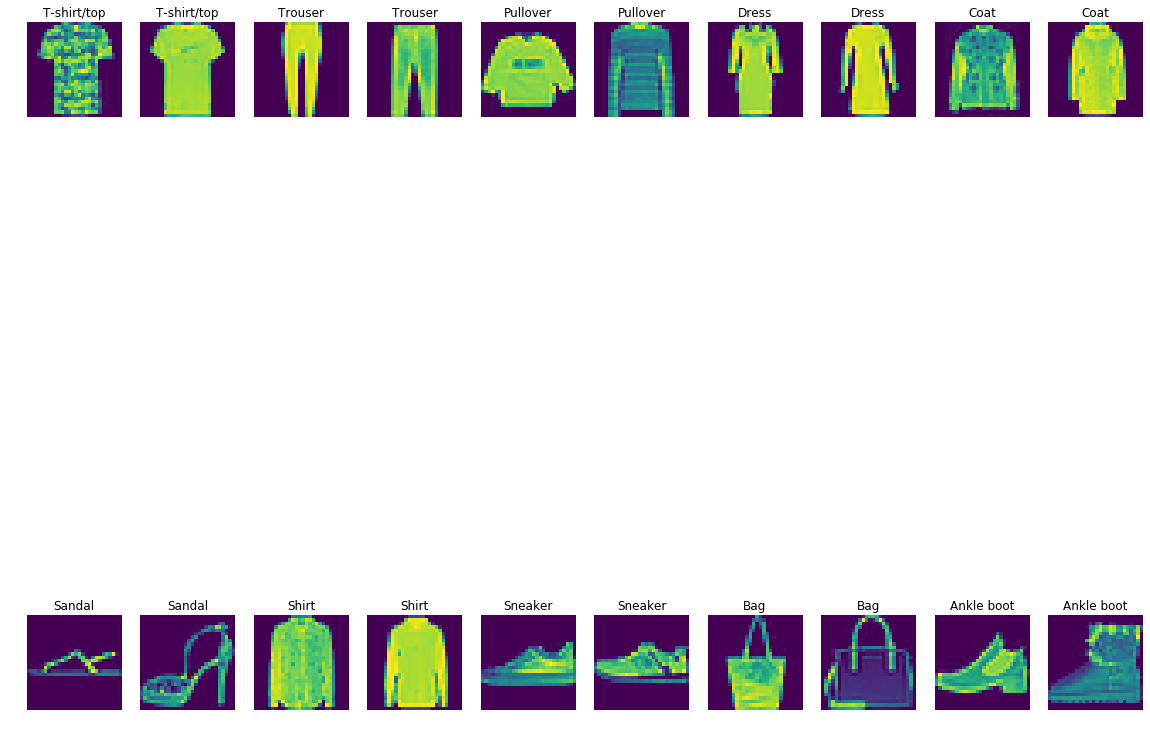

In [34]:
# plot the images
def plot_img(images, image_labels):
    fig, axes = plt.subplots(2, 10, figsize=(20,20))
    
    for i, image in enumerate(images):
        x_index = i//10
        y_index = i%10
        axes[x_index, y_index].imshow(image)
        axes[x_index, y_index].axis('off')
        axes[x_index, y_index].set_title(labels[image_labels[i]])
    
    plt.show()
    
plot_img(train_sample_img, train_sample_label)

In [35]:
# format the data
def  format_data(raw_data):
    out_y = keras.utils.to_categorical(raw_data.label, 10)
    num_images = raw_data.shape[0]
    
    image_data_arr = raw_data.values[:, 1:]
    
    # normalize to number between 0 and 1
    out_x = image_data_arr.reshape(num_images, ROWS, COLS, 1) / 255
    
    return out_x, out_y

# format the train & test data
x,y = format_data(train_data)
x_test,y_test = format_data(test_data)

# split the data into test and train
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=50)

In [36]:
# create the network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=(ROWS,COLS,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [37]:
# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
__________

In [38]:
# train the model (careful, this takes a while!)
train_model = model.fit(x_train, y_train, batch_size=128, epochs=64, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 27s 556us/step - loss: 0.6376 - acc: 0.7697 - val_loss: 0.4922 - val_acc: 0.8197
Epoch 2/64
48000/48000 [==============================] - 27s 571us/step - loss: 0.4213 - acc: 0.8466 - val_loss: 0.4082 - val_acc: 0.8476
Epoch 3/64
48000/48000 [==============================] - 25s 511us/step - loss: 0.3603 - acc: 0.8679 - val_loss: 0.3752 - val_acc: 0.8668
Epoch 4/64
48000/48000 [==============================] - 25s 530us/step - loss: 0.3239 - acc: 0.8819 - val_loss: 0.3547 - val_acc: 0.8693
Epoch 5/64
48000/48000 [==============================] - 27s 560us/step - loss: 0.2980 - acc: 0.8903 - val_loss: 0.3403 - val_acc: 0.8788
Epoch 6/64
48000/48000 [==============================] - 24s 507us/step - loss: 0.2714 - acc: 0.9000 - val_loss: 0.3340 - val_acc: 0.8810
Epoch 7/64
48000/48000 [==============================] - 24s 510us/step - loss: 0.2496 - acc: 0.9074 - val_loss: 0.

In [39]:
# get the score and print it
score = model.evaluate(x_test, y_test, verbose=0)
print(score[1])

0.8947


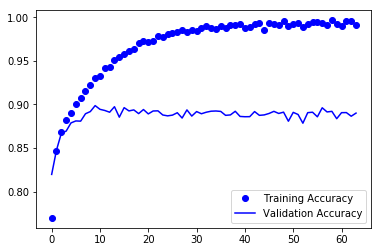

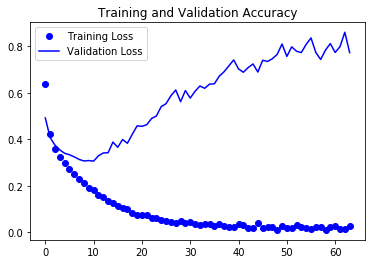

In [40]:
# plot the accuracy and loss
accuracy = train_model.history['acc']
val_accuracy = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [41]:
# create the network again
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=(ROWS,COLS,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 1, 128)         0         
__________

In [43]:
train_model = model.fit(x_train, y_train, batch_size=128, epochs=32, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/32
48000/48000 [==============================] - 24s 495us/step - loss: 0.8525 - acc: 0.6875 - val_loss: 0.5363 - val_acc: 0.8045
Epoch 2/32
48000/48000 [==============================] - 23s 487us/step - loss: 0.5573 - acc: 0.8008 - val_loss: 0.4572 - val_acc: 0.8318
Epoch 3/32
48000/48000 [==============================] - 23s 488us/step - loss: 0.4840 - acc: 0.8280 - val_loss: 0.3960 - val_acc: 0.8545
Epoch 4/32
48000/48000 [==============================] - 24s 491us/step - loss: 0.4394 - acc: 0.8427 - val_loss: 0.3657 - val_acc: 0.8674
Epoch 5/32
48000/48000 [==============================] - 23s 487us/step - loss: 0.4066 - acc: 0.8552 - val_loss: 0.3567 - val_acc: 0.8701
Epoch 6/32
48000/48000 [==============================] - 24s 495us/step - loss: 0.3823 - acc: 0.8626 - val_loss: 0.3390 - val_acc: 0.8757
Epoch 7/32
48000/48000 [==============================] - 24s 493us/step - loss: 0.3682 - acc: 0.8681 - val_loss: 0.

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy:', score[1])

Accuracy: 0.9097


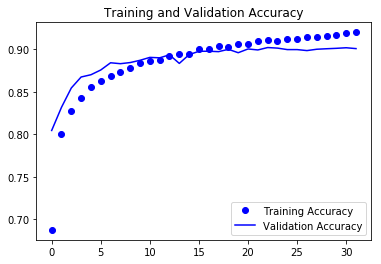

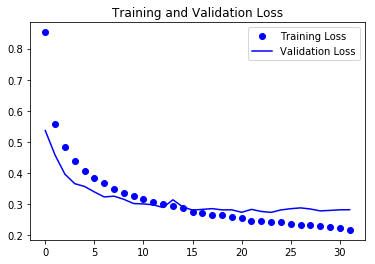

In [45]:
accuracy = train_model.history['acc']
val_accuracy = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [49]:
# get the model's prediction and the actual results
predicted = model.predict_classes(x_test)
y_true = test_data.iloc[:, 0]

# print the results of correct and incorrect
correct = np.nonzero(predicted == y_true)[0]
incorrect = np.nonzero(predicted != y_true)[0]

print('Correct: ', correct.shape[0])
print('Incorrect: ', incorrect.shape[0])

Correct:  9097
Incorrect:  903


In [50]:
# print a report of precision based on labels
target_names = ['Class %s (%s)' % (i, labels[i]) for i in range(10)]
print(classification_report(y_true, predicted, target_names=target_names))

                       precision    recall  f1-score   support

Class 0 (T-shirt/top)       0.89      0.85      0.87      1000
    Class 1 (Trouser)       1.00      0.98      0.99      1000
   Class 2 (Pullover)       0.85      0.86      0.86      1000
      Class 3 (Dress)       0.91      0.92      0.91      1000
       Class 4 (Coat)       0.88      0.84      0.86      1000
     Class 5 (Sandal)       0.99      0.96      0.98      1000
      Class 6 (Shirt)       0.73      0.79      0.76      1000
    Class 7 (Sneaker)       0.95      0.94      0.95      1000
        Class 8 (Bag)       0.98      0.98      0.98      1000
 Class 9 (Ankle boot)       0.93      0.97      0.95      1000

            micro avg       0.91      0.91      0.91     10000
            macro avg       0.91      0.91      0.91     10000
         weighted avg       0.91      0.91      0.91     10000

